<a href="https://colab.research.google.com/github/Diegbor/Proyecto_ML_BEDU/blob/main/Copia_de_Proyecto_ML_Equipo_24_Modelo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![BEDU logo](https://drive.google.com/uc?id=1GERI1OgKL5MPNdf89PWnYiU1PQ20LJld)


<center> Módulo 4   


# <center> Proyecto Machine Learning
# <center> Detección de Fraudes en Tarjetas de Crédito


__Equipo 24__

Integrantes:
* Diego
* Carlos
* Jorge
* Pedro
* Alexis
* Taryn

## Objetivo





```
# Esto tiene formato de código
```

### Descripción del Problema

> Es importante que las compañías bancarias y crediticias sean capaces de reconocer transacciones fraudulentas en trajetas de crédito para que los tarjetahabientes no reciban cargos deconocidos.  



### Descripción del conjunto de datos


El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. __El conjunto de datos está fuertemente desequilibrado: la clase positiva (fraudes) representa el 0.172% de todas las transacciones__.

El dataset contiene variables numéricas que son el resultado de una transformación PCA. Lamentablemente, debido a cuestiones de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2,… V28 son los componentes principales obtenidos con PCA. Las únicas características que no se han transformado con PCA son 'Time' y 'Amount'.   
La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos.   
La característica 'Monto' es el monto de la transacción, esta característica se puede utilizar para dependant cost-sensitive learning.  
La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Dado el __índice de desequilibrio de clases__, recomendamos medir la __precisión utilizando el área bajo la curva de recuperación de precisión (AUPRC)__. La precisión de la matriz de confusión no es significativa para una clasificación desequilibrada.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Problema a Resolver y Métodos


__Problema__: Utilizar varios modelos predictivos para ver qué tan precisos son para detectar si una transacción es un pago normal o un fraude.

__Models__

- _Árbol de decisión_: Es un tipo de algoritmo de machine learning algorithm que usa un modelo similar a un árbol para hacer prediciones basadas en las relaciones entre las características del dataset. Trabaja dividiendo los datos en conjuntos más perqueños basados en los valores de las características hasta que alcance una decisión acerca de la variable objetivo para cada grupo.

- __Logistic Regression__: Es un tipo de algoritmo de  type of machine learning que es unsado para la clasificación de tareas y modela la probabilidad de que una muestra pertenezca a cierta clase usando una fonción lo´gistica.

Modelo Supervisado de Clasificación:
- Probaremos modelos sobre la variable objetivo Class.
- El problema principal del dataset es que está desbalanceado, por lo que se usarán técnicas de balanceo de datos (undersampling, oversampling).

### Importando los módulos

In [3]:
# Para exploración y análisis de datos

import pandas as pd  # Para procesamiento de datos, csv, dataframes.
import numpy as np  # Para funciones de álgebra lineal y otras funciones matemáticas
import seaborn as sns  # Para gráficos
from sklearn.feature_selection import chi2, f_classif #Selección de variables
from sklearn.preprocessing import MinMaxScaler #escalamiento
import matplotlib.pyplot as plt # Para gráficos
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

### Leyendo Los datos



Usando la metodología de las siguientes páginas para no descargar el archivo localmente, sino extraerlo de la API de Kaggle:
* [ Platzi](https://platzi.com/tutoriales/1794-pandas/6926-usando-la-api-de-kaggle-con-google-colab-para-carga-y-descarga-de-datasets/?&gad_source=1&gclid=Cj0KCQiApOyqBhDlARIsAGfnyMr0UeMtsnpiqBIjzxbIBeJ6-zhVZLMzf6CMzPXU1igSDv7E23wc-hYaAoDpEALw_wcB&gclsrc=aw.ds
)
* [Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

In [4]:
# Instalar la librería de Kaggle
! pip install -q kaggle

In [5]:
# Importar el módulo del sistema de archivos de Google Colab
from google.colab import files

Descargar la API key de la página de Kaggle: Settings-> Account-> API -> Create New API Token -> Guardar el archivo kaggle.json

In [6]:
# Usar el comando de files.upload() para cargar el archivo en el sistema local.
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaredguerra","key":"cef5e2bd537109fed5c18deb98b2dbc4"}'}

In [7]:
# Crear un directorio llamado kaggle
! mkdir ~/.kaggle

# Copiar el archivo 'kaggle.json' que se
! cp kaggle.json ~/.kaggle/

# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

# Con el código 600 se otorga los permisos de lectura para las credenciales.
!chmod 600 ~/.kaggle/kaggle.json

# Probar la conexión a la API de Kaggle. Va a salir una lista de los datasets que tenemos disponibles para consulta.
! kaggle datasets list

# Descargar el dataset de creditcardfraud. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
! kaggle datasets download -d mlg-ulb/creditcardfraud

# Descomprimir el archivo que se descarga.
!unzip creditcardfraud.zip


ref                                                                  title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                      DAIGT V2 Train Dataset                               29MB  2023-11-16 01:38:36           1511        154  1.0              
muhammadbinimran/housing-price-prediction-data                       Housing Price Prediction Data                       763KB  2023-11-21 17:56:32           6786        120  1.0              
thedevastator/netflix-imdb-scores                                    Netflix IMDB Scores                                 699KB  2023-12-03 14:10:34           2135         37  1.0              
andreinovikov/olympic-games        

In [8]:
# Leer el archivo csv cen un dataframe con pandas.
df = pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## 1. Pandas y Análisis Exploratorio de Datos
- Crear Series y DataFrames y aprovecharlas a la perfección
- Usa conceptos estadísticos para realizar un análisis exploratorio datasets para entender sus datos antes de realizar cualquier manipulación



##### **Análisis descriptivo**

In [9]:
# Revisando los datos.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- __Time__: segundos entre transacciones. Dos días del mes de Septiembre de 2013.
- __Amount__: Monto de la transacción en Euros.
- __Class__: 0 No- Fraudulenta, 1 Fraudulenta.
- __V1 to V28__: Son el resultado de una transformación PCA debido a privacidad de la información.



In [10]:
# Información Estadística: Count, mean, std, min, 25%, 50%, 75%, max.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Información del dataframe: rango de datos, número de columnas, nombre de las columnas, valores nulos, tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- Las columnas __V1 a V28__ ya han sido escaladas, las únicas columnas que no han sido escaladas son __'Time', 'Amount', 'Class'__.   
- El número de transacciones es relativamente pequeño.   
- Podemos observar que en la columna de __Amount__, o el monto de las transacciones, la media es de __88 euros__, pero tenemos valores que llegan a más __25,000 euros__.
- En la columna __Tiempo__, también existe una gran varianza de los datos.


#### L**impiando el Dataset**



In [12]:
# Analizar si existen valores nulos en el df y determinar si es necesario un reemplazo.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**No existen valores nulos, por lo que no es necesario reemplazar valores.**

In [ ]:
# Duplicados - Jorge

# Duplicados fraudulentos

#### **Análisis Exploratorio**

##### **Analizando la columna 'Class'**

In [13]:
# Determinar el número de transacciones Fraudulentas o No Fraudulentas

transacciones_con_fraude = (df['Class'] == 1).sum()
transacciones_sin_fraude = (df['Class'] == 0).sum()

print(f'Transacciones con Fraude: {transacciones_con_fraude} \nTransacciones sin fraude: {transacciones_sin_fraude}')

Transacciones con Fraude: 492 
Transacciones sin fraude: 284315


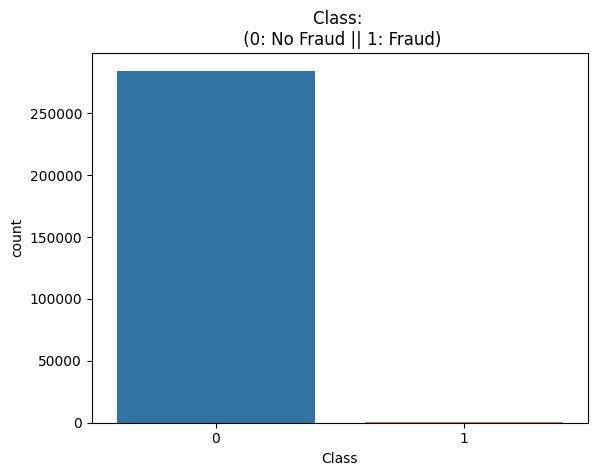

In [14]:
# Gráfico de Barras para el conteo de transacciones

sns.countplot(df, x = "Class")
plt.title('Class: \n (0: No Fraud || 1: Fraud)');

In [15]:
# Determinar el porcentaje de transacciones fraudulentas vs porcentaje de transacciones no fraudulentas.

porcentaje_con_fraude = (df['Class'] == 1).sum() / len(df['Class'])
porcentaje_sin_fraude = (df['Class'] == 0).sum() / len(df['Class'])

print(f'Porcentaje de Transacciones con Fraude: {porcentaje_con_fraude:.2%} \nPorcentaje de Transacciones sin fraude: {porcentaje_sin_fraude:.2%}')

Porcentaje de Transacciones con Fraude: 0.17% 
Porcentaje de Transacciones sin fraude: 99.83%


In [16]:

# df_fraude = df['Class'].value_counts()
df_fraude = df[["Class", "Time"]].groupby("Class")[["Time"]].count().reset_index()

df_fraude

,Class,Time
0,0,284315
1,1,492


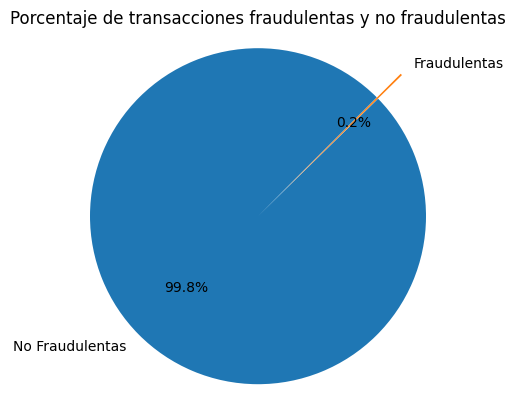

In [17]:
# Gráfico de pie de porcentajes
porcentajes = df_fraude["Time"] / df_fraude["Time"].sum() * 100

nombres = ['No Fraudulentas', 'Fraudulentas']

desfase =(0,0.2)
plt.pie(porcentajes, labels=nombres, autopct='%1.1f%%', startangle=45, explode=desfase)
plt.axis('equal') # Se usa para que se vea como un círculo
plt.title('Porcentaje de transacciones fraudulentas y no fraudulentas');

Los datos están altamente **desbalanceados**, el porcentaje de transacciones clasificados sin fraude es de 99.83%, mientras el porcentaje de transacciones clasificadas sin fraude es de 0.17% y,  por lo tanto, debemos hacer alguna transformación o nuestro modelo de aprendizaje solo predecirá casos no fraudulentos. Nuestro objetivo es que el modelo detecte patrones que nos den señales de fraude.

https://www.analyticslane.com/2021/03/01/uso-de-las-f-string-de-python-para-mejorar-el-formato-de-textos/

https://www.kaggle.com/code/angelicarico/analysis-credit-card-fraud

##### **Analizando las columnas V1 - V28**



Las columnas V1-28 ya han sido transformadas por PCA, por lo que ya han sido escaladas.

In [18]:
df_temp = df.copy()
cols = list(df_temp.columns.values)

no_frauds = df_temp.Class == 0
with_frauds = df_temp.Class == 1



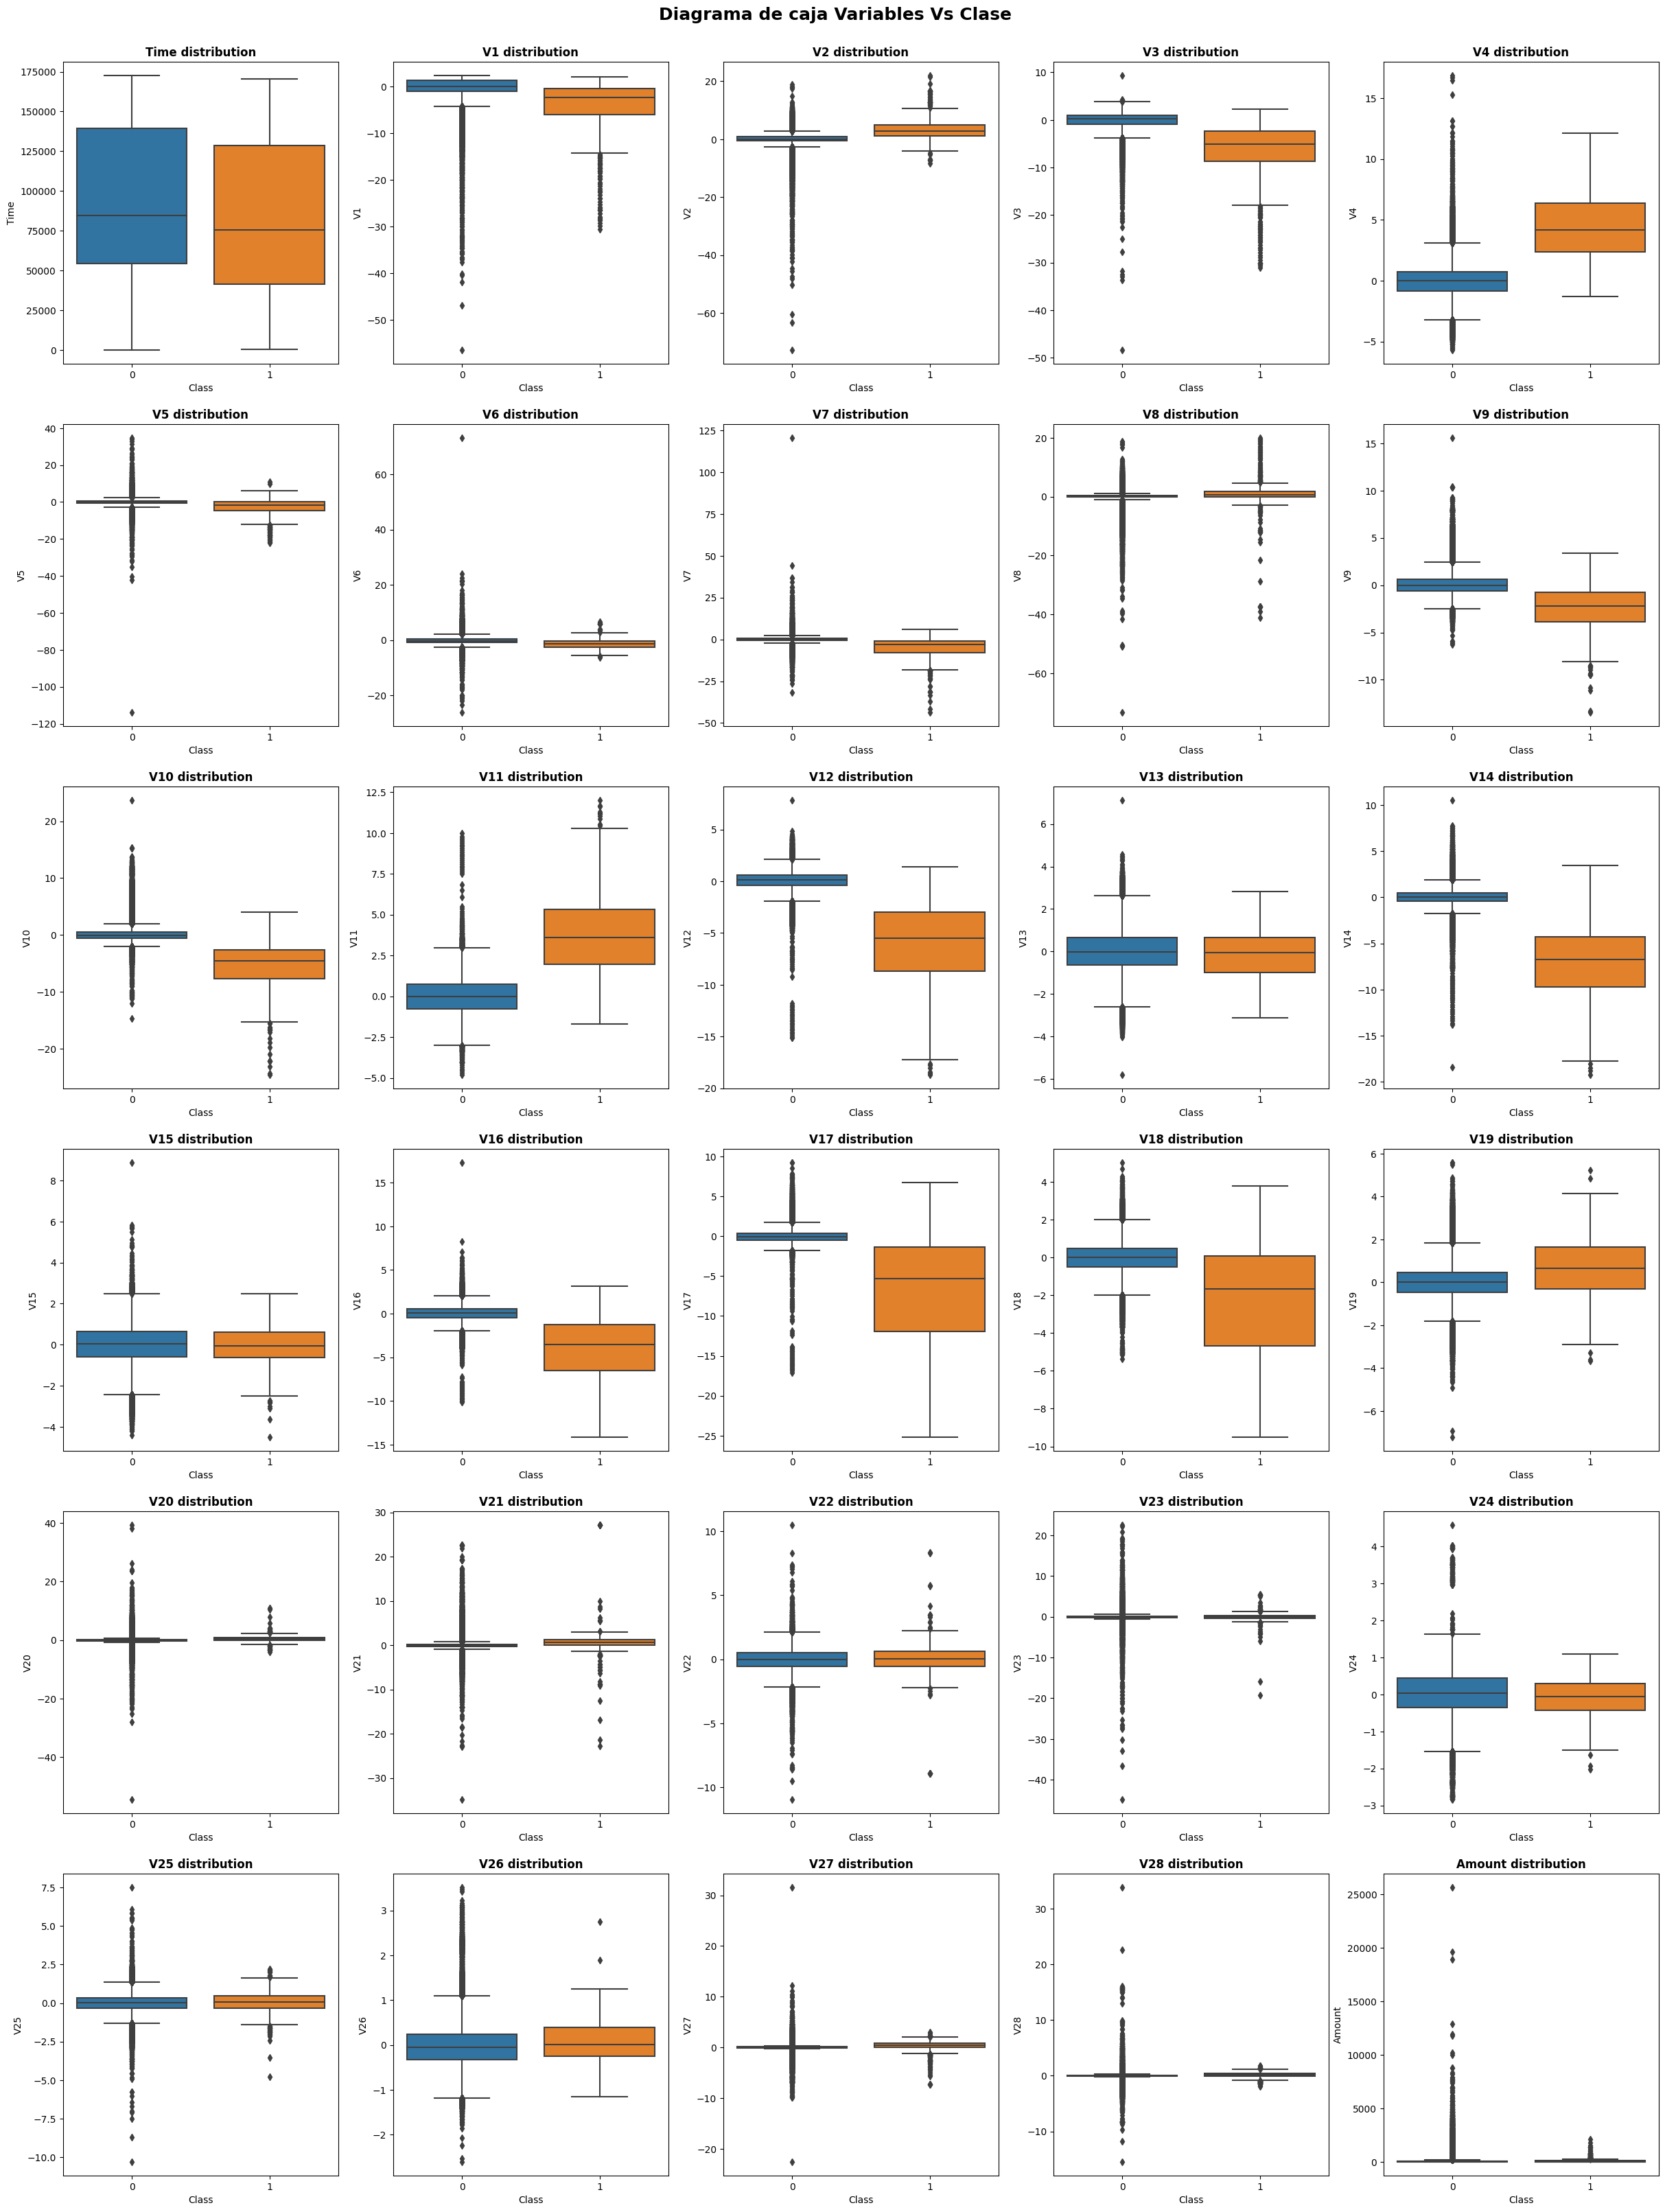

In [24]:
# Se crea un DF donde se guardan los resultados de los analisis bivariado y pruebas de hipotesis
df_reduccion = pd.DataFrame(index=df.columns[:-1])
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(30,40))
fig.suptitle('Diagrama de caja Variables Vs Clase', size = 18, y=0.9, fontweight='bold')
fila=0
colum=0

for i in df.columns[:-1]:
  sns.boxplot(ax=axes[fila,colum], data=df, x='Class', y=i)
  axes[fila,colum].set_title(f"{i} distribution",fontweight='bold')
  colum= colum+1
  if colum == 5:
    colum=0
    fila+=1




In [26]:
df_reduccion["Visual"]=[0, 1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0, 1,0, 0, 0, 0, 0, 1,0, 0]


De acuerdo a las distribuciones anteriores se concluye lo siguiente:

**Time**: No se observan diferencias significativas en ambas clases para esta variable.
**Amount**: No se observan diferencias significativas en ambas clases para esta variable.
**V13, V15, V20, V22, V23, V24, V25, V26, V28**: No se observan diferencias significativas en ambas clases para estas variables.
Las variables restantes presentan distribuciones distintas para la clase



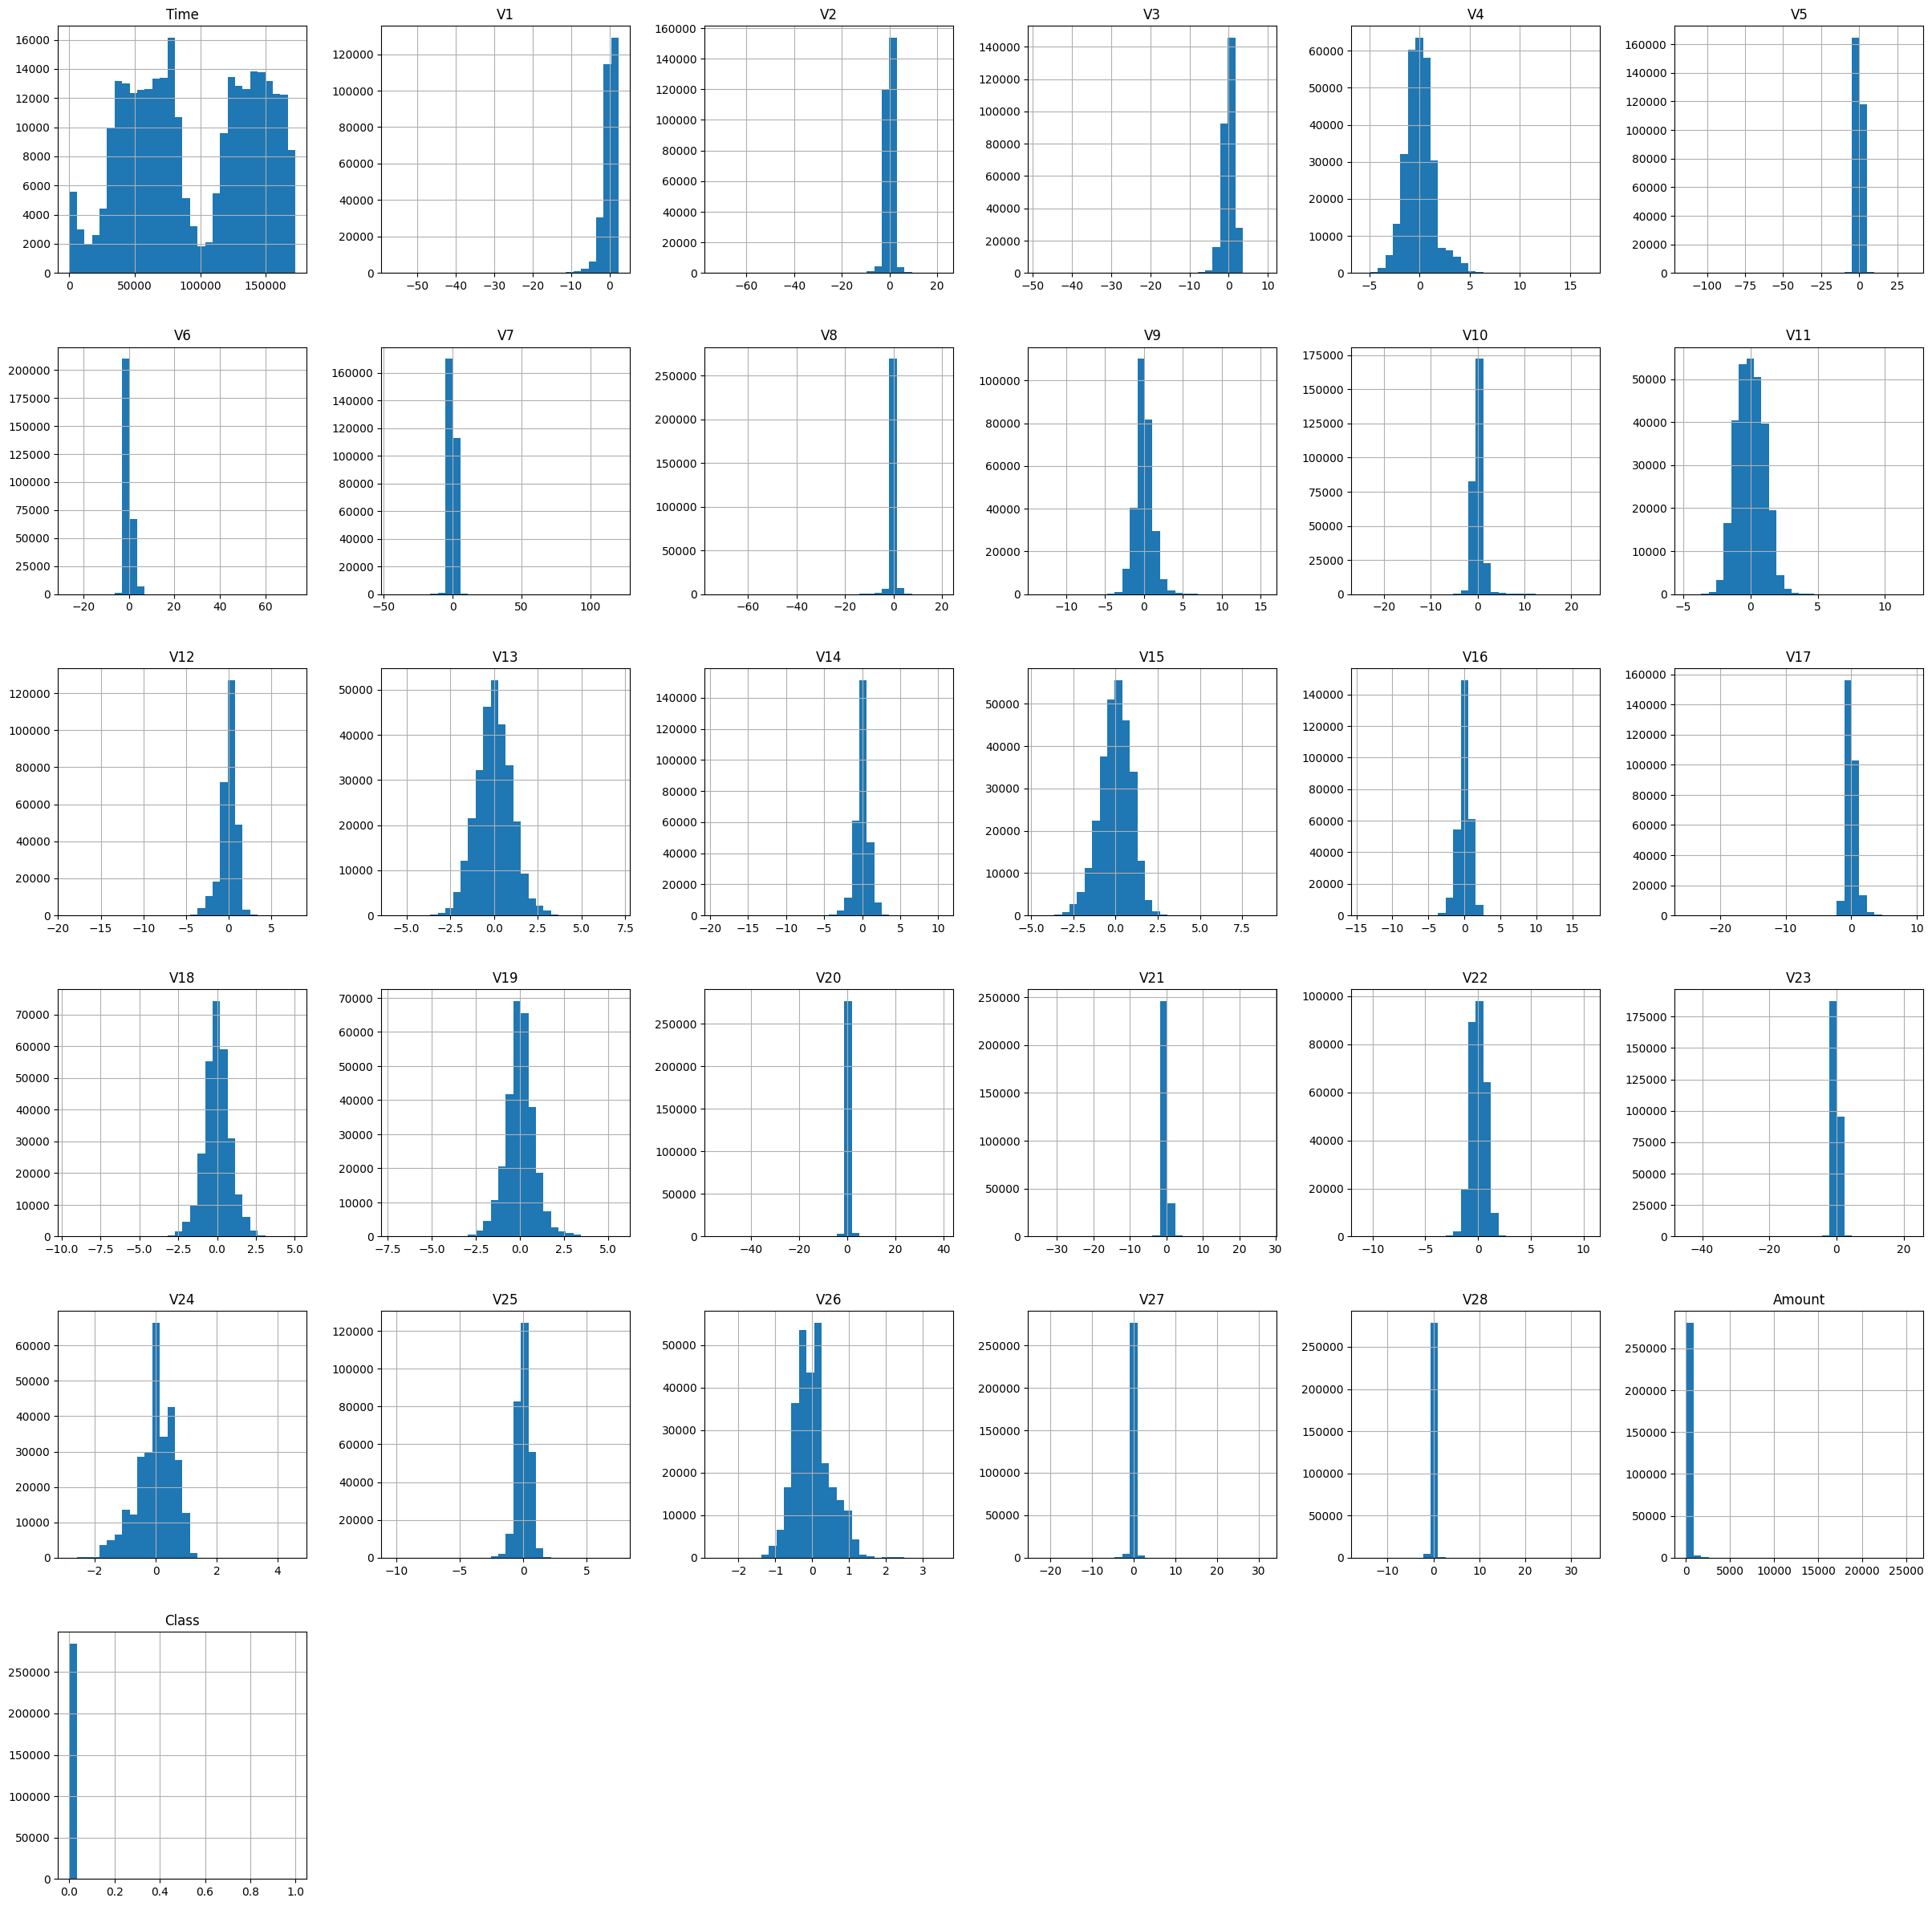

In [29]:
# Crea los histogramas de todas las columnas
df.hist(bins = 30, figsize=(30,30));

Comentarios: Se puede observar que las distribuciones de V1-V28 tienen una distribución más parecida a una normal.

Referencias:   
- https://www.youtube.com/watch?v=v14ydtOuOr4
- https://www.youtube.com/watch?v=M_Cu7r9gik4&list=TLPQMDExMjIwMjMvG_hqJzTdLg&index=2

##### **Analizando la columna Time y Amount**

In [ ]:
sns.distplot(df['Time']).set(title="Distribución de Tiempo de Transacción");

In [ ]:
sns.distplot(df['Amount']).set(title="Distribución de Monto de la Transacción");

Se puede observar que los datos están sesgados y tienen muchos outliers, por eso es necesario escalar la información, lo cual podría hacerse con un escalamiento robusto (robust scaling) o un escalamiento min-max.


> *El escalamiento robusto es menos sensible a los valores atípicos en los datos. Escala las características de entrada en función de su mediana y rango intercuartílico (IQR). El IQR es el rango entre el primer cuartil (percentil 25) y el tercer cuartil (percentil 75) de los datos. El escalamiento robusto es particularmente útil para datos con valores atípicos significativos o distribuciones no gaussianas.*



> *El escalamiento min-max, también conocido como normalización, escala las características de entrada a un rango específico, generalmente entre 0 y 1. Esto se logra restando el valor mínimo de la característica a cada punto de datos y dividiendo el resultado por el rango de la característica. Es especialmente útil para datos con distribuciones sesgadas o cuando los algoritmos requieren que las características de entrada estén dentro de un rango específico.*



Referencias:
- Escalamiento: https://ts2.space/es/escalamiento-de-caracteristicas-en-aprendizaje-automatico/#gsc.tab=0

#####__Matriz de Correlaciones__

In [ ]:
# Matriz de correlaciones
corr = df.corr()

corr

In [ ]:
# Mapa de calor
sns.heatmap(corr, cmap="Blues");


#####**Conclusiones**  
1. Los datos están altamente desbalanceados (oversampling, undersampling), lo cual nos generará problemas con nuestros modelos de machine learning.  
2. La columna Amount tiene valores atípicos (outliers) muy grandes, lo que puede crear un problema en el modelo. Debido a eso es necesario escalar los datos.
3. No se puede observar una correlación entre las variables

### Escalamiento de las columnas Time y Amount . Alexis

**Escalamiento de la columna Amount**

Se hará un escalamiento robusto de la columna Amount con la librería [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).



[Fórmula:](https://hersanyagci.medium.com/feature-scaling-with-scikit-learn-for-data-science-8c4cbcf2daff#:~:text=RobustScaler%20is%20a%20median%2Dbased,is%20not%20affected%20by%20outliers.&text=Since%20it%20uses%20the%20interquartile,effects%20of%20outliers%20while%20scaling.)



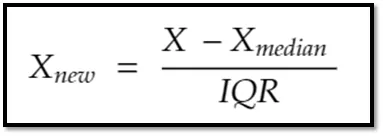

In [ ]:
# Importar la librería Preprocessing de sklearn
from sklearn.preprocessing import RobustScaler

In [ ]:
# Creamos una copia del df original, lo llamamos nueva_df
nueva_df = df.copy()

# Aplicamos el escalamiento robusto a la columna Amount.
# fit_transform ajusta los datos después los transforma, se le pasa la columna Amount convertida a un numpy de dos dimensiones.
# Reshape (-1,1) significa: -1 cualquier cantidad de filas, 1 una columna

nueva_df['Amount'] = RobustScaler().fit_transform(nueva_df['Amount'].to_numpy().reshape(-1,1))

nueva_df['Amount'].hist();

In [ ]:
nueva_df['Amount'].describe()

Se puede observar que el rango de los datos es mucho menor al que teníamos antes.





**Escalamiento de la columna Time**

Para la columna Time se usará el escalamiento de tipo Min-Max


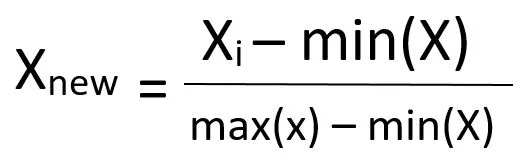

In [ ]:
time_df = nueva_df['Time']
nueva_df['Time'] = (time_df - time_df.min()) / (time_df.max() - time_df.min())
nueva_df

In [ ]:
nueva_df['Time'].hist();

En el caso de la columna Time acotamos el rango a valores entre cero y uno.

#### **Escogiendo variables**

**Significancia de las variables**


-  _El desafío principal radica en la naturaleza desequilibrada del conjunto de datos, donde las transacciones fraudulentas representan una pequeña proporción en comparación con las transacciones legítimas_. Esto requiere el desarrollo de estrategias efectivas para abordar el desequilibrio y evitar sesgos en el modelo predictivo.

- _Se requerirá un enfoque integral que abarque la ingeniería de características, el análisis exploratorio de datos y la implementación de algoritmos de aprendizaje automático apropiados para detectar patrones y anomalías relacionadas con transacciones fraudulentas_.


 >En un análisis de fraude con tarjetas de crédito, ANOVA podría usarse para comparar las medias de diferentes grupos o categorías y ver si existen diferencias significativas. Si ANOVA indica diferencias significativas, esto sugiere que ciertas categorías de compras están más asociadas con el fraude.

> Uso de la Prueba Chi-cuadrada: Esta prueba se utilizaría para examinar la relación entre variables categóricas en el conjunto de datos.

>Una prueba Chi-cuadrada significativa indicaría una relación entre estas variables categóricas y el fraude.


> Para las pruebas de hipotesis se consideron un alfa del 0.05, donde si el p-valor es menor a este alpha, la varible se considera significativa para predecir la variable objetivo.

>>>True = p-valor<=0.05
>>>False = p-valor>0.05

>Por consideraciones practicas se tomo la siguiente nomenclatura dependiendo del resultado del p-valor, así:

True = 1
False = 0


In [27]:
#ANOVA


x = df.drop('Class', axis=1)
y = df['Class']
f_scores = f_classif(x,y)
p_values = f_scores[1]
alpha = 0.05
significacia = []
for i in range(len(p_values)):
  p = p_values[i]
  if p < alpha:
    significacia.append(1)
  else:
    significacia.append(0)
df_reduccion["Anova"]=significacia
df_reduccion




,Visual,Anova
Time,0,1
V1,1,1
V2,1,1
V3,1,1
V4,1,1
V5,1,1
V6,1,1
V7,1,1
V8,1,1
V9,1,1


In [28]:
# Chi cuadrada


columnas = df.columns[:-1]
df_escala = df.copy()
df_escala[columnas] = MinMaxScaler().fit_transform(df_escala[columnas])
x = df_escala.drop('Class', axis=1)
y = df_escala['Class']

chi_squared = chi2(x,y)

p_values = chi_squared[1]
alpha = 0.05
significacia = []
for i in range(len(p_values)):
  p = p_values[i]
  if p < alpha:
    significacia.append(1)
  else:
    significacia.append(0)
df_reduccion["Chi2"]=significacia
df_reduccion

,Visual,Anova,Chi2
Time,0,1,1
V1,1,1,0
V2,1,1,0
V3,1,1,1
V4,1,1,1
V5,1,1,0
V6,1,1,0
V7,1,1,0
V8,1,1,0
V9,1,1,1


In [29]:
df_reduccion["Seleccion"]= df_reduccion['Anova']+df_reduccion['Chi2']+df_reduccion['Visual']
df_reduccion

,Visual,Anova,Chi2,Seleccion
Time,0,1,1,2
V1,1,1,0,2
V2,1,1,0,2
V3,1,1,1,3
V4,1,1,1,3
V5,1,1,0,2
V6,1,1,0,2
V7,1,1,0,2
V8,1,1,0,2
V9,1,1,1,3


In [30]:
columns_final = list(df_reduccion[df_reduccion["Seleccion"]>=2].index.values)
columns_final = columns_final + ["Class"]
columns_final

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V21',
 'V27',
 'Class']

In [31]:
df = df[columns_final]

## 2. ¿Por qué el problema amerita ser solucionado por Machine Leaning?

Nuestro problema amerita ser resuelto con una técnica de machine learning debido a que nuestro objetivo es entrenar el algoritmo para reconocer patrones de casos fraudulentos a partir de la información que obtenemos de una transacción. Es decir, queremos identificar anomalías en los datos que podrían indicar un problema en una transacción.  [[1]](https://www.elastic.co/es/what-is/machine-learning#:~:text=La%20detecci%C3%B3n%20de%20anomal%C3%ADas%20es,Conoce%20m%C3%A1s%20sobre%20AIOps.)


En particular, creemos que podemos usar un modelo suvervisado de clasificación y también de regresión, debido a las características de nuestro dataset. La variable objetivo 'Class' funciona como una etiqueta donde el valor 1 indica que una transacción es fraudulenta y un 0 indica que no es fraudulenta.

# Modelo de Clasificación

In [ ]:
# Importando Módulos
from sklearn.model_selection import train_test_split

## División de Datasets
Los datasets se encuentran divididos en entrenamiento y prueba, o entrenamiento, validación y prueba, de manera aleatoria, con proporciones adecuadas.  [[2]](https://builtin.com/data-science/train-test-split)

In [ ]:
# Dividiendo los datos en entrenamiento X, y prueba y.
X = nueva_df.drop('Class', axis=1) # Atributos
y = nueva_df['Class']  # Etiquetas

In [ ]:
# Dividiendo los conjuntos de datos en entrenamiento y prueba
# Test size =  25%
# Train size = 75%
# (semilla) random_state = 50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
# Imprimir las longitudes de los conjuntos de datos para verificar
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))
print(f'Suma de las etiquetas y: {np.sum(y)} \nSuma de los valores de entrenamiento de y: {np.sum(y_train)} \nSuma de los valores de prueba de y: {np.sum(y_test)} ')

In [ ]:
# Distribución del conjunto de datos de entrenamiento y_train
y_muestra_train = pd.DataFrame(y_train)
sns.countplot(y_muestra_train, x ="Class");

Referencia: https://www.youtube.com/watch?v=pohp5AZrp3I&list=PLrR_uxt9l8PvDQan0_QMB5oS3OwWoCiYk

### Seleccionando Muestras  - Diego - Domingo

Necesitamos una submuestra del dataframe que contenga un monto igual de casos fraudulentos como no fraudulentos.

El objetivo es permitir que nuestro modelo de aprendizaje pueda entender mejor los patrones que determinan si una transacción es fraudulenta o no.

Debido al desbalance de los datos originales, no se puede observar las correlaciones verdaderas entre la variable objetivo y las demás características.




Referencias:
- https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [ ]:
#Dado que la mayoría de nuestros datos ya han sido escalados,
#debemos escalar las columnas que quedan por escalar (Cantidad y Tiempo)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler es menos propenso a valores atípicos.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_monto'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_tiempo'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Monto y Tiempo estan escaladas

df.head()

In [ ]:
#Lo que entendí de esta celda es que hace la comparación de resultados de pruebas del dataset original con el dataset escalado
#En realidad veo inecesaria esta prueba por lo que creo que es mejor no hacerla

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [ ]:
#Vamos a mezclar los datos antes de crear las submuestras.
df = df.sample(frac=1)

# Obtenemos 492 fraudes y 492 no fraudes
fraude_df = df.loc[df['Class'] == 1]
no_fraude_df = df.loc[df['Class'] == 0][:492]
#Juntamos los dos dataframes
distribucion_df = pd.concat([fraude_df, no_fraude_df])

# Revolvemos las filas del dataframe
df_ff = distribucion_df.sample(frac=1, random_state=42)

df_ff.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
252836,155991.0,-2.166964,-1.011631,0.986721,1.350219,-0.222675,-0.264904,-0.168004,0.791223,-0.259621,...,0.583943,0.781867,0.294575,-0.047425,-0.024248,-0.387018,0.253877,-0.062767,231.00,0
153823,100223.0,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,2.28,1
98797,66821.0,1.446882,-0.198676,-0.168033,-0.665991,-0.526911,-1.378273,0.060290,-0.483604,-1.342983,...,0.205759,0.587439,-0.180683,0.462679,0.834680,-0.089180,-0.020842,0.004841,15.00,0
163149,115691.0,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,17.06,1
42700,41204.0,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,30.26,1


In [ ]:
df_ff.shape

(984, 31)

Distribución de las clases en el conjunto de datos de la submuestra
0    0.5
1    0.5
Name: Class, dtype: float64


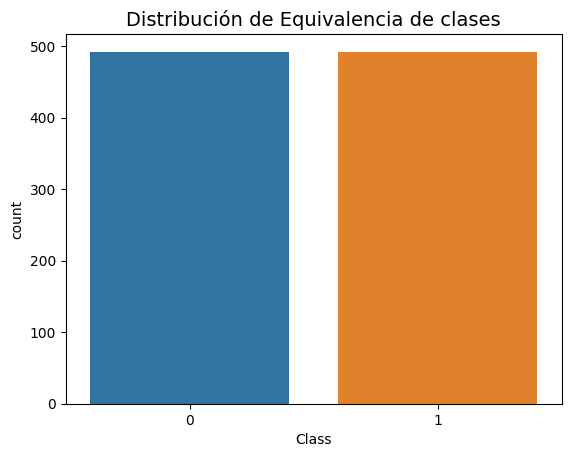

In [ ]:
print('Distribución de las clases en el conjunto de datos de la submuestra')
print(df_ff['Class'].value_counts()/len(df_ff))


sns.countplot(data=df_ff, x='Class')
plt.title('Distribución de Equivalencia de clases', fontsize=14)
plt.show()

In [ ]:
# Para balancear la clase con una distribución igual
# Usaremos una combinación de Oversampling y Undersampling
# Usaremos la librería de SMOTE

from imblearn.over_sampling import SMOTE
over_sample = SMOTE()

x_smote, y_smote = over_sample.fit_resample(X_train, y_train)


In [ ]:
# Distribución del conjunto de datos de entrenamiento y_train
y_muestra_train = pd.DataFrame(y_smote)
sns.countplot(y_muestra_train, x ="Class");

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## Algoritmo de Clasificación

Las métricas presentadas son claras y se interpretan adecuadamente. El algoritmo de clasificación elegido sobrepasa al resto de los algoritmos en eficacia.

In [ ]:
# Lazypredict - Taryn

In [ ]:
import lazypredict

ModuleNotFoundError: ignored

In [ ]:
# Matriz Consfusion y la ROC - Alexis y Pedro

**Modelo Regresión Logística**  
- Modelo de Aprendizaje Supervisado
- Se usa para predecir la variable categórica dependiente (en este caso es 'Class') usando un conjunto de variables independientes.

In [ ]:
# Regresión Logística

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

model = LogisticRegression()

# Entrenamiento
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7046632124352332


 Referencias:
 - [Regresión Logística](https://aws.amazon.com/es/what-is/logistic-regression/#:~:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20una%20t%C3%A9cnica%20importante%20en%20el%20campo,de%20datos%20sin%20intervenci%C3%B3n%20humana.)

__Árbol de Decisión__  Taryn
- Modelo de Aprendizaje Supervisado.
- Se puede usar para problemas de clasificación y regresión.
- Es un clasificador de tres estructuras, donde los nodos interiores representan las características del dataset, y las ramas representan las reglas de decisión donde cada hoja representa un outcome.


In [ ]:
# Árbol de Decisión

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=42)

# Entrenamiento
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

In [ ]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#Revisamos el dataset
df = pd.read_csv('/content/creditcard.csv')
df

In [ ]:
#Definir variables
X = df.drop('Class', axis=1)
y = df.Class

In [ ]:
#Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Modelo de arbol de desición
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol

DecisionTreeClassifier(random_state=42)

In [ ]:
#Entrenamiento
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Predicciones
predicciones = modelo_arbol.predict(X_test)
predicciones

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#Precision del modelo
precision = np.mean(predicciones == y_test)
print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}')

Precisión del modelo en el conjunto de prueba: 1.00


In [ ]:
# Reporte de Clasificación
print(classification_report(y_test, predicciones))

# F1 Score
print("F1 Score:", f1_score(y_test, predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.7428571428571428


In [ ]:
#Validacion cruzada
scores = cross_val_score(modelo_arbol, X, y, cv=5)
print(f'Precisión de validación cruzada: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

Precisión de validación cruzada: 0.80 (+/- 0.79)


__Random Forest__


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

model = RandomForestClassifier()

# Entrenamiento
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.8636363636363635


## Validación por K-Fold o LOOCV

Las pruebas de validación cruzada se aplican adecuadamente en conjunto con los algoritmos, de tal manera que no hay datos favoritos o fácilmente clasificables en el dataset de pruebas


### Validación Cruzada K-Fold Taryn



* La validación cruzada (K-fold) es una técnica para evaluar el rendimiento de un modelo de forma robusta.   
* Divide los datos en conjuntos de entrenamiento y prueba múltiples veces.   
* Permite una evaluación más precisa de cómo el modelo generaliza a datos no vistos.   
* Ayuda a evitar el sobreajuste (overfitting) y proporciona una medida más fiable del rendimiento del modelo.
[[Sesion 2]](https://github.com/alemora24/C1-Machine-Learning-MASIVO/blob/main/Sesion-02/Ejemplo02.ipynb
)


In [ ]:
# Importando bibliotecas
import numpy as np
from sklearn.model_selection import KFold

In [ ]:
# Definir el número de pliegues para la validación cruzada
num_pliegues = 5

In [ ]:
# Crear un objeto KFold para dividir los datos en pliegues
kf = KFold(n_splits=num_pliegues, shuffle=True, random_state=42)

### Métricas de Desempeño

**Confusion Matrix**  
* Una matriz de confusión nos ayuda a describir el desempeño de un modelo de clasificación sobre un conjunto de datos de prueba para los cuales se conocen los valores verdaderos.   
* Muestra cuántos casos se clasificaron correctamente (verdaderos positivos y verdaderos negativos) y ls que se clasificaron incorrectamente (falsos positivos y falsos negativos).   
* Nos ayuda a evaluar la precisión y el rendimiento del modelo.
 [[Ref]](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a%20performance%20evaluation%20tool%20in%20machine,false%20positives%2C%20and%20false%20negatives.)

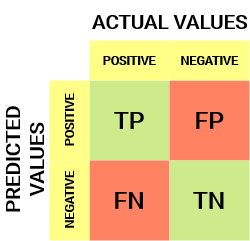

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

**Reportes de Clasificación**



El reporte de clasificación consiste en presentar métricas que evalúen el desempeño del modelo. Dichas métricas pueden ser:
- Precisión
- Sensibilidad
- Especificidad
- F1-Score
- AUC - ROC
- Error Cudrático Medio (MSE)
- Coeficiente de Determinación (R^2)

**Precisión :**  
Mide la proporción de predicciones correctas sobre el total de predicciones.  
Fórmula: Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)


__Sensibilidad:__  




__F1-Score:__  


__AUC-ROC__



# Referencias

Referencias:

- https://www.elastic.co/es/what-is/machine-learning

- https://www.geeksforgeeks.org/getting-started-machine-learning/?ref=lbp

- https://www.youtube.com/watch?v=M_Cu7r9gik4&list=TLPQMDExMjIwMjMvG_hqJzTdLg&index=2

- https://www.youtube.com/watch?v=NCgjcHLFNDg&t=540s

- https://www.youtube.com/watch?v=sq5BYW4COwA

- https://www.youtube.com/watch?v=v14ydtOuOr4

Guión

-